In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.datasets import make_classification
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_dataset(X, y, label):
    X = pd.DataFrame(X, columns = ["Feature_1", "Feature_2"])
    y = pd.Series(y)

    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(
        data = X, 
        x = "Feature_1", y = "Feature_2", 
        hue = y, 
        style = y, 
        markers = markers
    )

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()

0    9900
1     100
dtype: int64


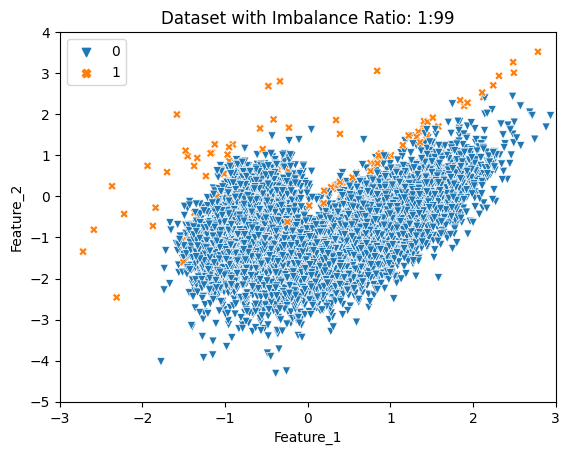

In [3]:
X, y = make_classification(
    n_samples = 10000,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    flip_y = 0,
    n_clusters_per_class = 2,
    class_sep = 0.79,
    weights = [0.99],
    random_state = 81,
)

plot_dataset(X, y, "Dataset with Imbalance Ratio: 1:99")

### RandomUnderSampler :


   - `RandomUnderSampler` is a technique used for addressing class imbalance in machine learning datasets.
   - It focuses on the majority class by randomly removing instances from that class until a more balanced distribution is achieved.

   - It performs random undersampling, which involves randomly selecting instances from the majority class for removal.
   - The goal is to reduce the number of instances in the majority class to be closer to the number of instances in the minority class.

   - The `RandomUnderSampler` is often implemented as part of the imbalanced-learn library in Python.
   - It can be easily used by creating an instance of `RandomUnderSampler` and applying the `fit_resample` method to obtain a resampled dataset.

   - While `RandomUnderSampler` can help address class imbalance, it also comes with potential information loss from the discarded majority class instances.
   - The choice of the random seed (`random_state`) ensures reproducibility in the sampling process.
   - It is one of several strategies for handling imbalanced datasets, and its effectiveness depends on the specific characteristics of the dataset and the machine learning model being used.

Resampled dataset shape Counter({0: 100, 1: 100})
0    100
1    100
dtype: int64


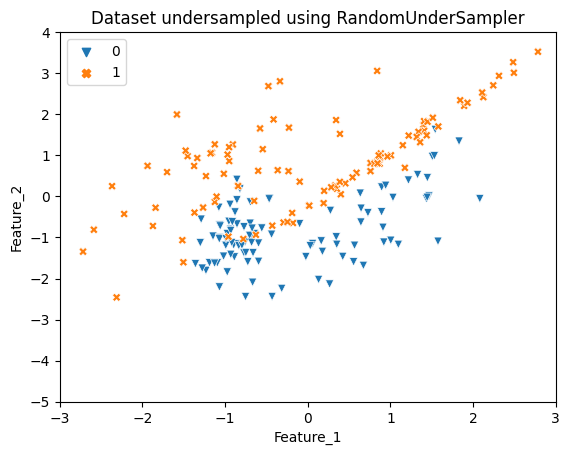

In [5]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset undersampled using RandomUnderSampler")